# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [2]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [17]:
mnist = fetch_openml('mnist_784') #mnist 손글씨 데이터를 불러옵니다


In [19]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [32]:
X = mnist['data']
y = mnist['target']

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [33]:
print(X.shape, y.shape)

(70000, 784) (70000,)


In [36]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = ['pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['pixel0']=0

In [37]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [39]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


<Figure size 640x480 with 0 Axes>

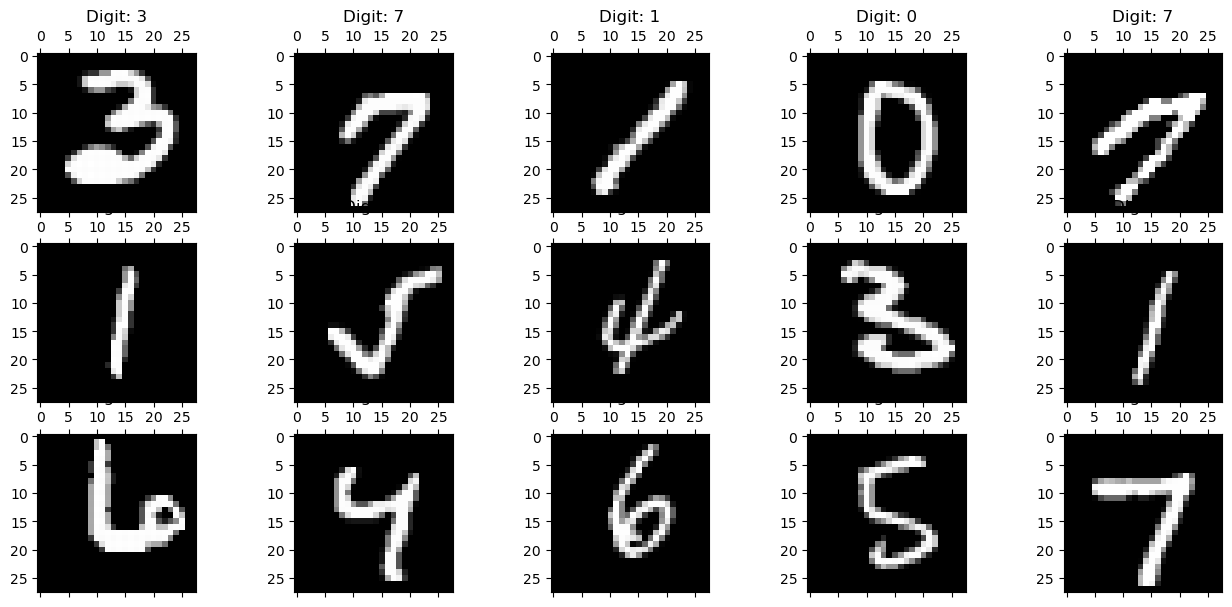

In [40]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [55]:
one_hot_y = pd.get_dummies(df['y'])

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [41]:
scaled_X = X / 255.0

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(56000, 784)
(14000, 784)
(56000,)
(14000,)


### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=X.shape[1], copy=False) #일단 아무개수나 
pca_x = pca.fit_transform(X_train)
pca_x

array([[ 4.92032377e-01, -2.15353895e+00, -7.22444671e-01, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.52504901e-01,  2.59776603e+00,  2.48252046e+00, ...,
         1.23158689e-16, -4.35354524e-16,  4.72040776e-17],
       [-7.96027788e-01,  7.21512862e-01, -2.37459272e+00, ...,
         9.57070454e-16,  6.05040554e-16, -1.60760188e-16],
       ...,
       [-3.83443347e+00, -1.45287698e+00,  7.73954777e-02, ...,
         6.81710741e-18,  4.18099550e-18, -2.21489742e-18],
       [ 4.80284806e+00, -1.56210442e+00,  3.05639264e+00, ...,
        -4.36599950e-18,  1.70237353e-18,  5.25746436e-19],
       [ 3.12588484e+00, -4.13093294e+00,  3.22660913e+00, ...,
         1.23490033e-17,  1.42678956e-18, -7.76712618e-18]])

In [58]:
exv = pca.explained_variance_
exv.shape

(784,)

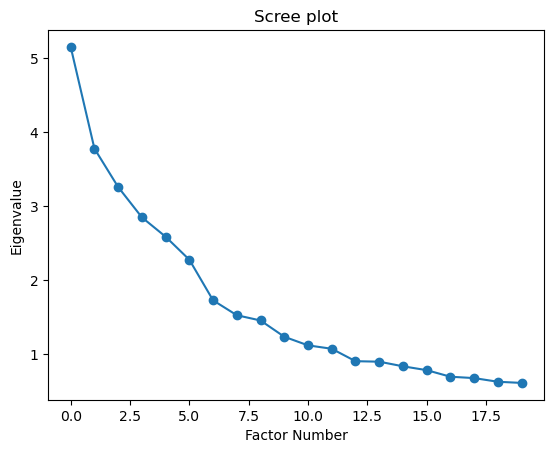

In [59]:
plt.title("Scree plot") #plot을 그려서 적당한 주성분의 개수를 구해보자. 
plt.plot(np.arange(exv[:20].shape[0]), exv[:20], marker='o') # 너무 많으면 세세하니까 80개만 표시
plt.xlabel("Factor Number")
plt.ylabel("Eigenvalue")
plt.show()

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
lda_X = clf.fit_transform(X_train,y_train) 
lda_X.shape

(56000, 9)

In [61]:
# explained_variance_ratio_에 각 변수의 설명력을 구할 수 있다.
clf.explained_variance_ratio_

array([0.23801142, 0.20214164, 0.17770134, 0.10681218, 0.09457475,
       0.06940949, 0.0497301 , 0.03443888, 0.02718019])

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import accuracy_score

In [63]:
lr = LogisticRegression(max_iter=1000, random_state=42) # warnings 방지
rf = RandomForestClassifier(random_state=42)

In [66]:
models = [lr,rf]
start = time.time()
#원본데이터 그대로 이용
for model in models:
    model.fit(X_train, y_train)
    print(f"model: {model.__class__()}, accuracy_score: {accuracy_score(y_test, model.predict(X_test))}")

end = time.time()

print("경과시간", end - start)

model: LogisticRegression(), accuracy_score: 0.595
model: RandomForestClassifier(), accuracy_score: 0.18621428571428572
경과시간 141.0202407836914


In [68]:
# pca 변환 (80%로 설명)
pca = PCA(n_components=0.80, copy=False)
pca_x = pca.fit_transform(X_train)

# LDA 변환
clf = LinearDiscriminantAnalysis()
lda_X = clf.fit_transform(X_train,y_train)

In [69]:
pca_test_X = pca.transform(X_test) # fit 하지않고 transform만 실시함
lda_test_X = clf.transform(X_test)

In [71]:
start = time.time()

for model in models: #pca
    model.fit(pca_x, y_train)
    print(f"model: {model.__class__()}, accuracy_score: {accuracy_score(y_test, model.predict(pca_test_X))}")

end = time.time()

print("경과시간", end - start)

model: LogisticRegression(), accuracy_score: 0.6012142857142857
model: RandomForestClassifier(), accuracy_score: 0.7681428571428571
경과시간 111.7353904247284


In [74]:
start = time.time()

for model in models: #lda 
    model.fit(lda_X, y_train)
    print(f"model: {model.__class__()}, accuracy_score: {accuracy_score(y_test, model.predict(lda_test_X))}")

end = time.time()

print("경과시간", end - start)

model: LogisticRegression(), accuracy_score: 0.8152142857142857
model: RandomForestClassifier(), accuracy_score: 0.8484285714285714
경과시간 58.9285352230072


- fittime도 원본데이터를 이용할때보다 많이 줄었고, 정확도도 오른것을 알 수 있다. 
- pca보다 lda의 성능이 더 좋게 나왔다. 

특정한 틀 없이 자유롭게 해주시면 됩니다!